# PCA and  Desision Tree Classification for the "Behavorial Dataset"
In this notebook, we will build and evaluate a Decision Tree Classifier to predict 

In [15]:
pip install DecisionTree    

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.metrics import accuracy_score # To evaluate the model
from sklearn import datasets # To get the dataset
from sklearn import tree # to draw a tree   
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA   
import data_outcomes

In [3]:
# Read the data
diabetes_df = data_outcomes.getDiabetesBehaviorDataframe() 

----> Retrieving information for Resources/diabetes_data.csv


In [4]:
# show the first 5 rows of the data set 
diabetes_df.head()


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
10,12.0,0.0,1.0,1.0,24.0,1.0,1.0,1.0,1.0,1.0,0.0,3.0,0.0,4.0,0.0,0.0,1.0,0.0
14,10.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38386 entries, 4 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   38386 non-null  float64
 1   Sex                   38386 non-null  float64
 2   HighChol              38386 non-null  float64
 3   CholCheck             38386 non-null  float64
 4   BMI                   38386 non-null  float64
 5   Smoker                38386 non-null  float64
 6   HeartDiseaseorAttack  38386 non-null  float64
 7   PhysActivity          38386 non-null  float64
 8   Fruits                38386 non-null  float64
 9   Veggies               38386 non-null  float64
 10  HvyAlcoholConsump     38386 non-null  float64
 11  GenHlth               38386 non-null  float64
 12  MentHlth              38386 non-null  float64
 13  PhysHlth              38386 non-null  float64
 14  DiffWalk              38386 non-null  float64
 15  Stroke                38

In [6]:
# check for missing values
x = diabetes_df.drop('Diabetes', axis=1)
y = diabetes_df['Diabetes']


In [7]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   
X_scaled = scaler.fit_transform(x)

In [8]:
assert len(X_scaled) == len(y) # check that the number of rows in X and y are the same

In [9]:
num_components = X_pca.shape[1] # get the number of comoonents in the PCA
pca_columns = [f'PCA-{i}' for i in range(1, num_components+1)] # create a list of column names for the PCA components
df_pca = pd.DataFrame(X_pca, columns=pca_columns) # create a dataframe of the PCA components

NameError: name 'X_pca' is not defined

In [10]:
df_pca['Diabetes_Status'] = y # add the target variable to the dataframe

NameError: name 'df_pca' is not defined

In [11]:
# convert the target variable to a numpy array
if isinstance(y, pd.Series):
    y = y.values 

In [12]:
# information about the PCA dataframe
df_pca.info()

NameError: name 'df_pca' is not defined

In [13]:
# Verify PCA  values
df_pca = df_pca.round(4) 

NameError: name 'df_pca' is not defined

In [14]:
import seaborn as sns   
sns.scatterplot(x='PCA-1', y='PCA-2', hue='Diabetes_Status', data=df_pca, palette='viridis')
plt.title('PCA-1 vs PCA-2')
plt.show()

NameError: name 'df_pca' is not defined

In [15]:
# Applying PCA
pca = PCA(n_components = 2) 
X_pca = pca.fit_transform(X_scaled)

In [16]:
# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data = X_pca, columns = ['PCA1', 'PCA2'])
df_pca['Diabetes'] = y
df_pca.head()

,PCA1,PCA2,Diabetes
0,-1.858814,-0.138356,0.0
1,-2.711902,-1.440239,0.0
2,-1.958132,-1.014998,0.0
3,0.643424,2.408050,0.0
4,-0.424667,0.366823,0.0


In [17]:
X_pca 

array([[-1.8588137 , -0.13835628],
       [-2.71190199, -1.44023947],
       [-1.95813181, -1.01499797],
       ...,
       [ 3.27545186,  1.19184227],
       [ 1.57579706,  0.52045684],
       [ 0.02469637,  1.76436218]])

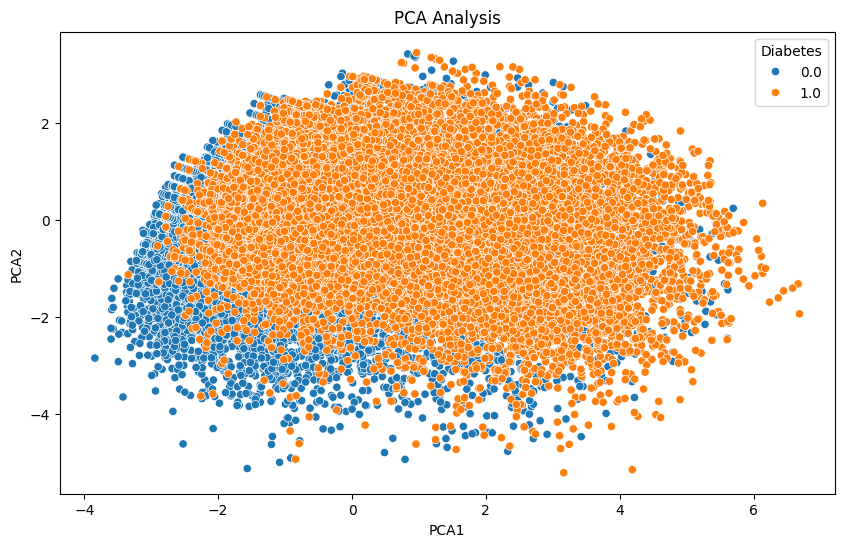

In [18]:
plt.figure(figsize = (10,6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_pca, hue='Diabetes')
plt.title('PCA Analysis')
plt.show()

In [19]:
print(f"Explained Variance: {pca.explained_variance_ratio_}")

Explained Variance: [0.20680077 0.09434419]


In [20]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Example variables (replace with actual data and PCA result)

pca_result = PCA(n_components=2)    # Your PCA-transformed data (shape: [n_samples, 2])
color = '#800080'  # Your class labels
explained_variance_ratio = pca.explained_variance_ratio_  # PCA explained variance ratio

# Custom color palette
colors = ['#1f77b4', '#ff7f0e']  # Custom blue and orange
cmap = ListedColormap(colors)

plt.figure(figsize=(12, 8))

# Scatter plot with transparency and edge color
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color, cmap=cmap, s=50, alpha=0.6, edgecolor='k')
#scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=color, cmap=cmap, s=50, alpha=0.6, edgecolor='k')

# Title and labels with explained variance
plt.title('PCA Analysis: 2D Projection of the Dataset (Explained Variance)')
plt.xlabel(f'PCA1 ({explained_variance_ratio[0]*100:.2f}% variance)')
plt.ylabel(f'PCA2 ({explained_variance_ratio[1]*100:.2f}% variance)')

# Add grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Add legend
plt.legend(handles=scatter.legend_elements()[0], labels=['0.0', '1.0'], title="Diabetes", loc='upper right')

# Save the plot
plt.savefig('pca_analysis_improved.png', dpi=300, bbox_inches='tight')

plt.show()


TypeError: 'PCA' object is not subscriptable

<Figure size 1200x800 with 0 Axes>

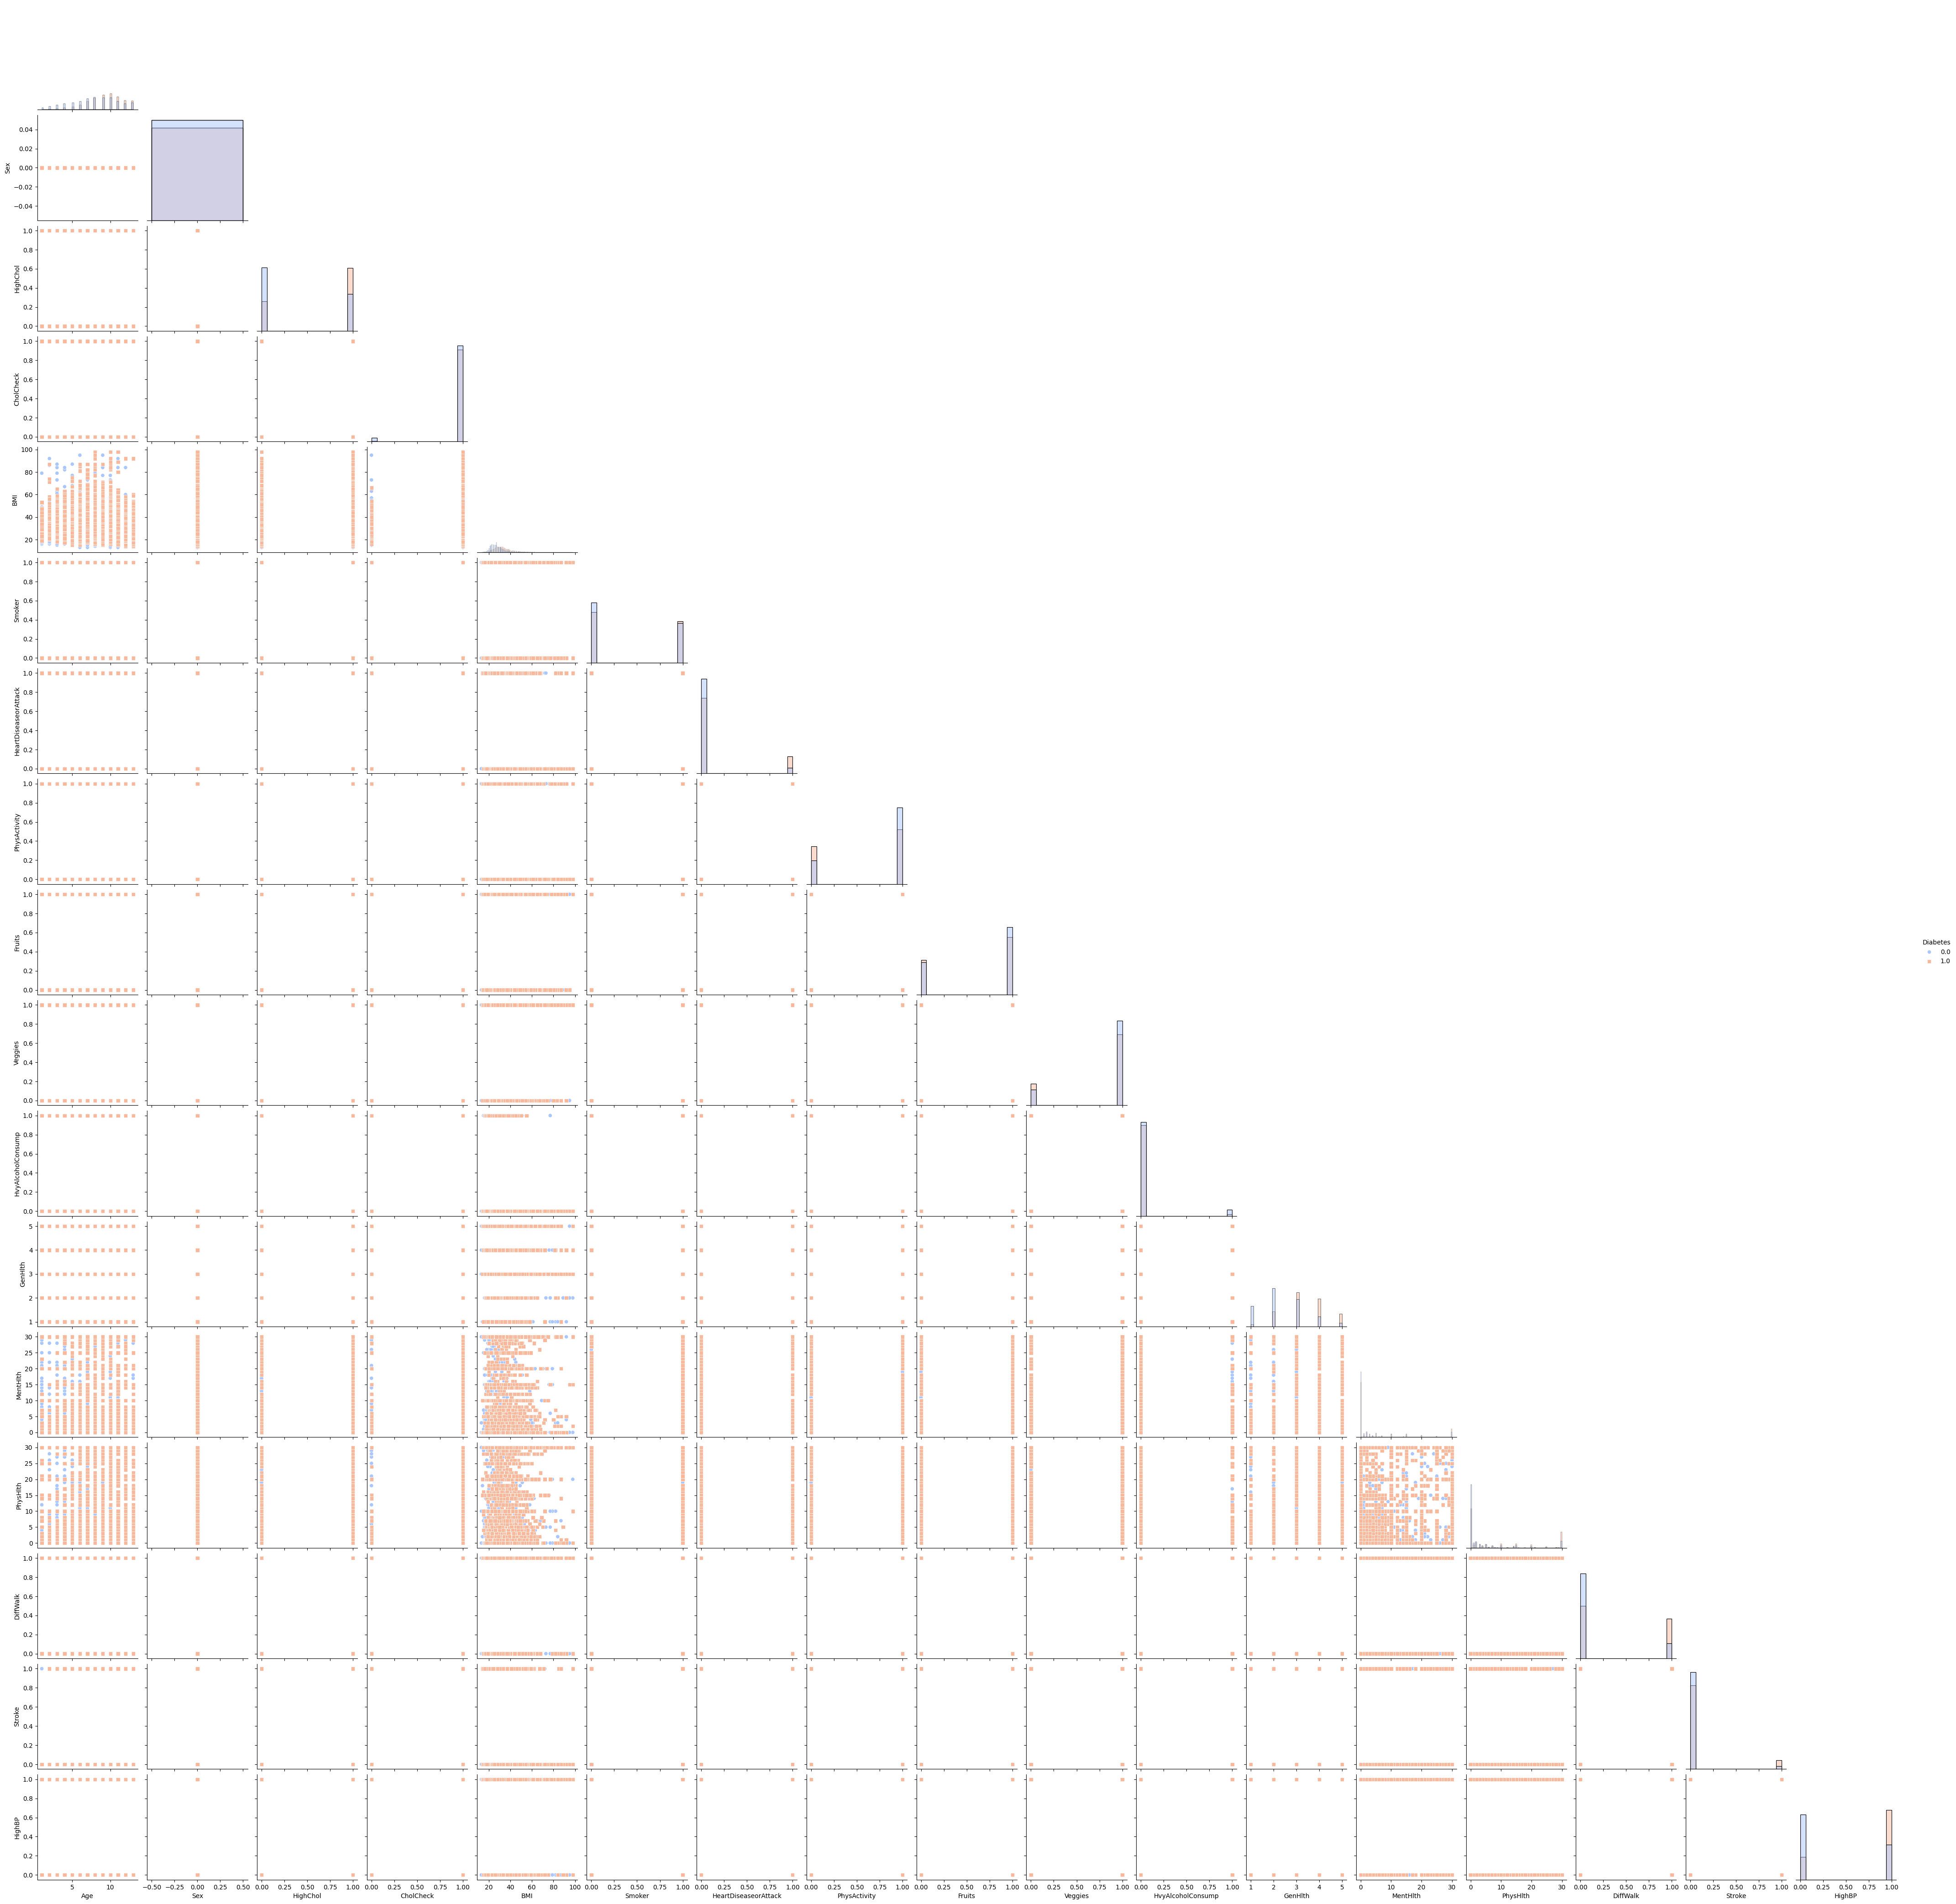

In [21]:
# Bigplot of the data
'''plt.figure(figsize=(10,6))
sns.pairplot(data=diabetes_df, hue='Diabetes')
plt.show()'''
sns.pairplot(data=diabetes_df, hue='Diabetes', height=2.5, markers=["o", "s"], palette='coolwarm', diag_kind='hist', corner=True)
plt.show()


In [22]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state =42)

In [23]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.6600382077110107


In [24]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.69      0.68      5989
         1.0       0.65      0.62      0.64      5527

    accuracy                           0.66     11516
   macro avg       0.66      0.66      0.66     11516
weighted avg       0.66      0.66      0.66     11516



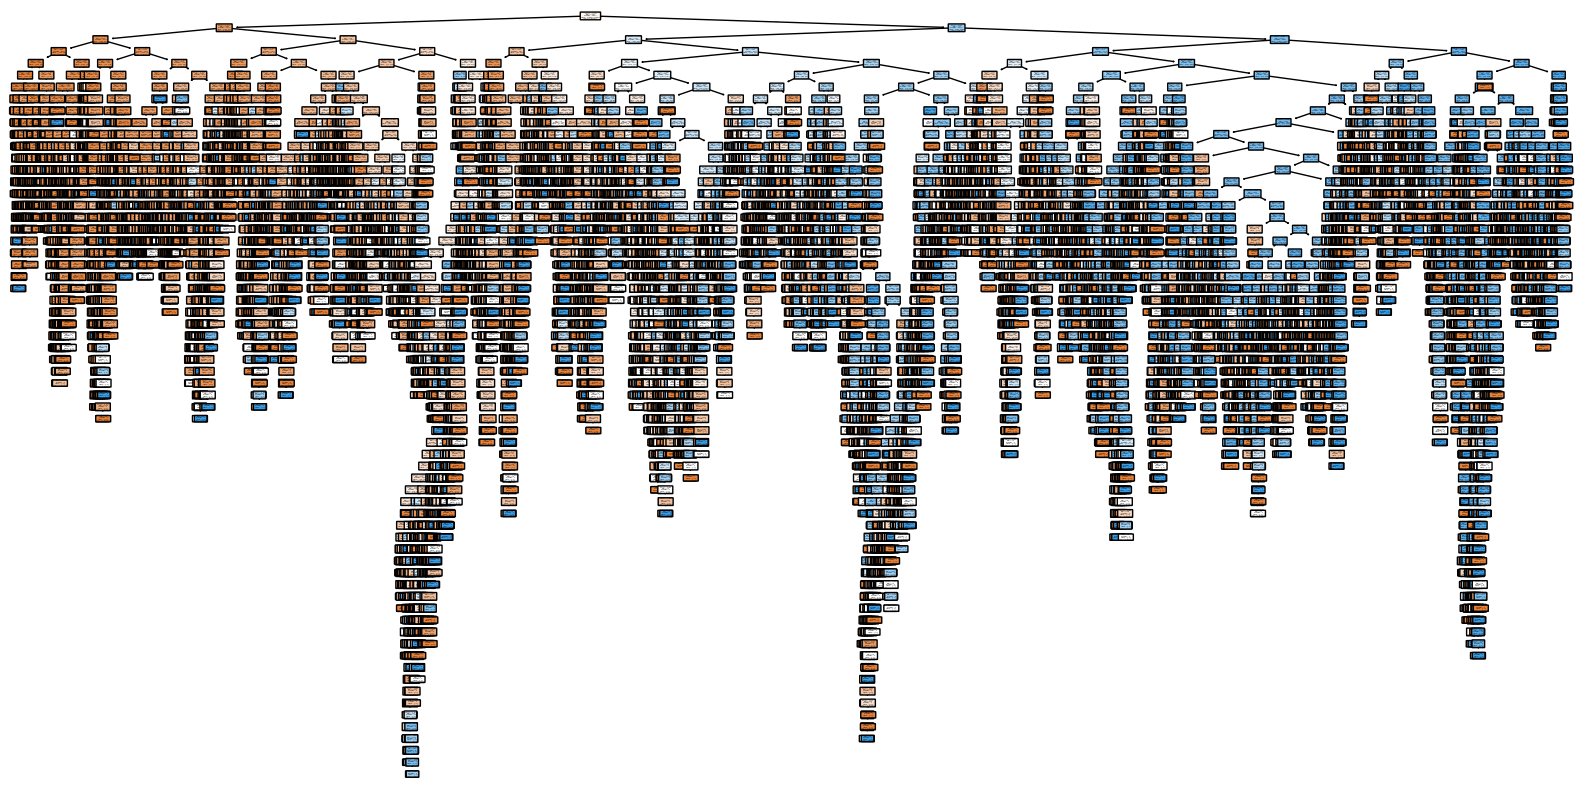

In [25]:
# Visualizing the tree
from sklearn.tree import plot_tree

# Plotting the tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, rounded=True, feature_names=['PCA1', 'PCA2'], class_names=['No Diabetes', 'Diabetes'])
plt.show()

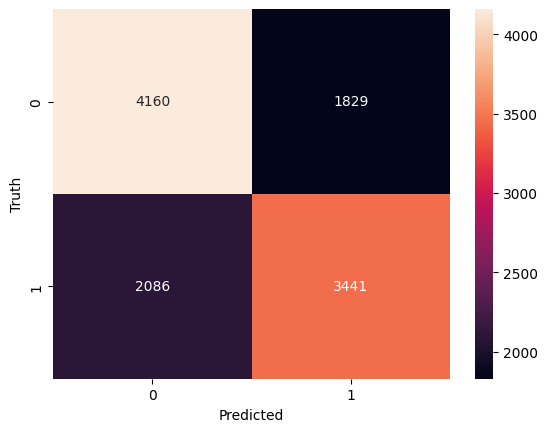

In [26]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [27]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

# Create a model
log_reg = LogisticRegression()


In [28]:
# Train the model
log_reg.fit(X_train, y_train)


LogisticRegression()

In [29]:
# Predictions
y_pred = log_reg.predict(X_test)


In [30]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7373219868009726


In [31]:
# Plotting the decision boundary
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train


(-6.2108612229776785, 4.419138777022095)

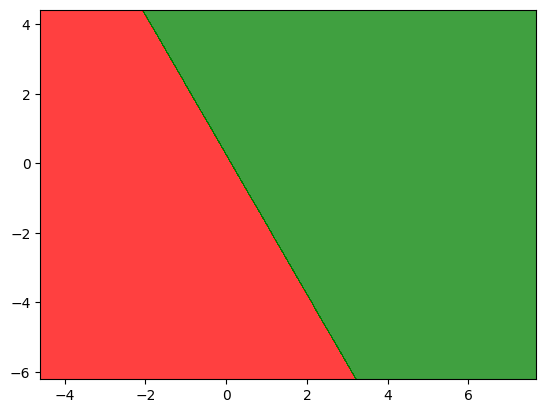

In [32]:
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                        np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


C:\Users\azamora\AppData\Local\Temp\ipykernel_31252\38958251.py:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


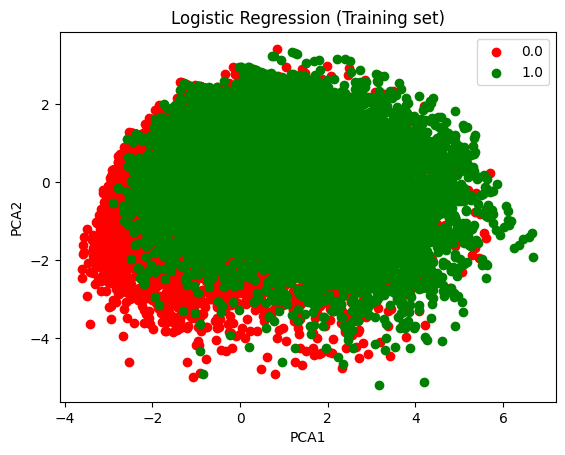

In [33]:
# Plotting the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()


In [34]:

#Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [35]:
# Create a model
nn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)


In [36]:
# Train the model
nn.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

In [37]:
# Predictions
y_pred = nn.predict(X_test)


In [38]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7430531434525877


In [39]:
# Plotting the decision boundary
from matplotlib.colors import ListedColormap


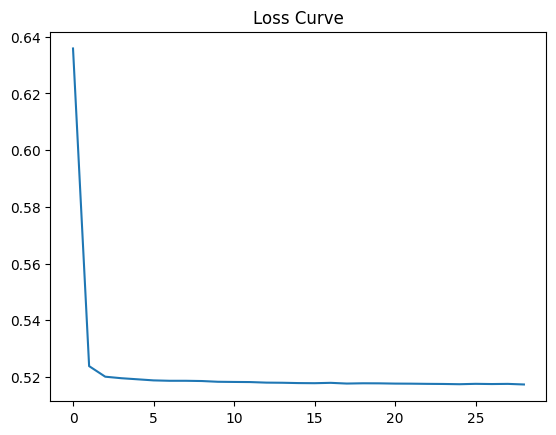

In [40]:
# Plot the loss curve
plt.plot(nn.loss_curve_)
plt.title('Loss Curve')
plt.show()




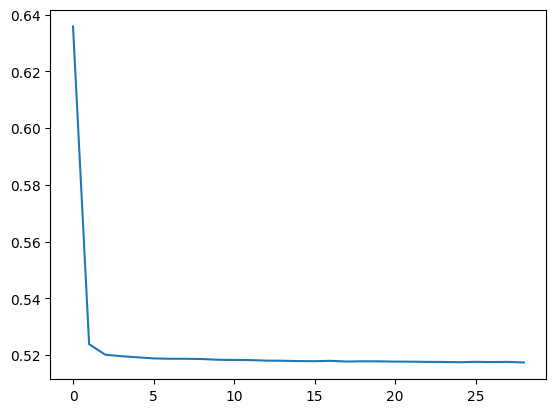

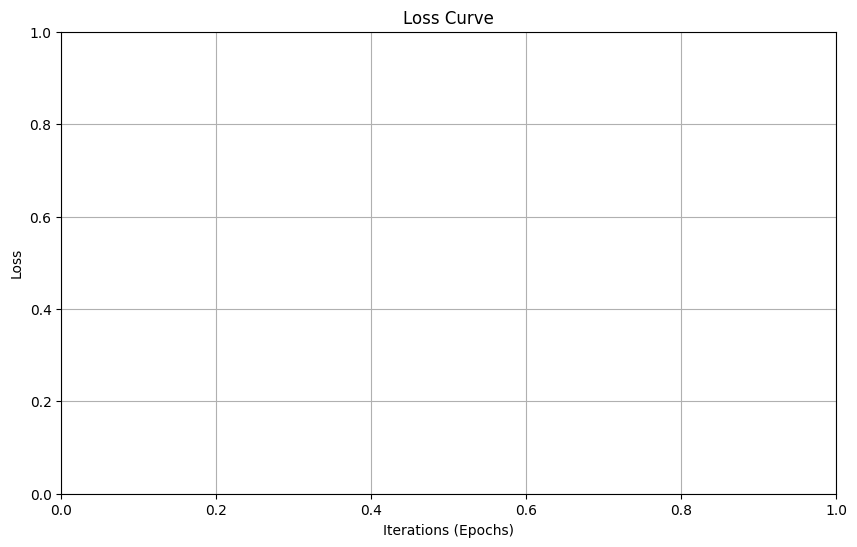

In [41]:
# Plot the Loss curve for the Neural Network
plt.plot(nn.loss_curve_)
plt.figure(figsize=(10,6))
plt.title('Loss Curve')
plt.xlabel('Iterations (Epochs)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()


In [42]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(nn, X_train, y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))




In [43]:
# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



In [44]:
train_sizes

array([  214,   649,  1083,  1517,  1952,  2386,  2820,  3255,  3689,
        4123,  4558,  4992,  5426,  5860,  6295,  6729,  7163,  7598,
        8032,  8466,  8901,  9335,  9769, 10204, 10638, 11072, 11506,
       11941, 12375, 12809, 13244, 13678, 14112, 14547, 14981, 15415,
       15850, 16284, 16718, 17152, 17587, 18021, 18455, 18890, 19324,
       19758, 20193, 20627, 21061, 21496])

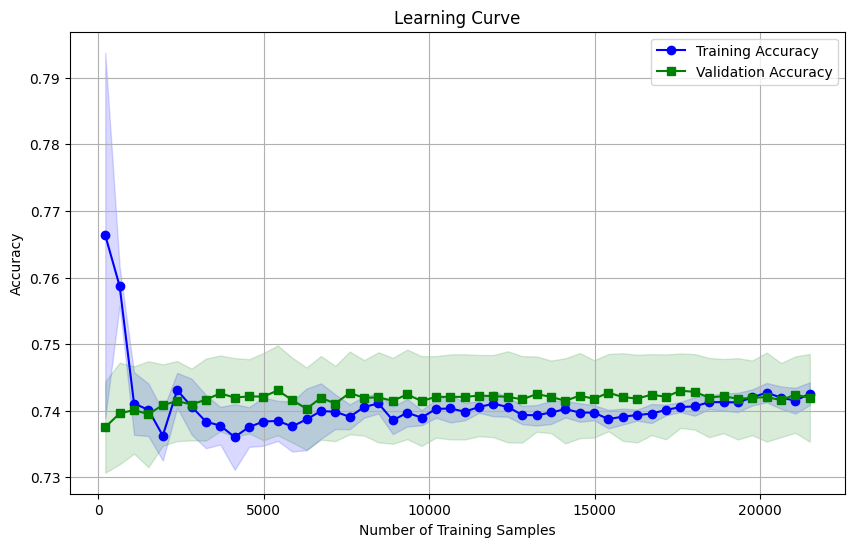

In [45]:
# Plot the learning curve
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', color='green', marker='s')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
#kfolds
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Create a model
nn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)



In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.pipeline import Pipeline
import numpy as np

X = diabetes_df.drop('Diabetes', axis=1)
y = diabetes_df['Diabetes']
# Assuming `X` is your feature matrix
# 1. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Apply PCA with a target for cumulative variance (90%)
pca = PCA(n_components=0.9)  # n_components=0.9 retains 90% of the variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance for each component
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Explained Variance for each component:", explained_variance)
print("Cumulative Variance:", cumulative_variance)
print("Total Explained Variance (90% target):", cumulative_variance[-1])

# Optional: If linear PCA still captures insufficient variance, try Kernel PCA
kpca = KernelPCA(n_components=10, kernel='rbf', gamma=0.1)  # Adjust gamma as needed
X_kpca = kpca.fit_transform(X_scaled)


Explained Variance for each component: [0.20680077 0.09434419 0.0770377  0.07203928 0.06487452 0.05933042
 0.05528409 0.054027   0.05199168 0.0469451  0.04579535 0.04368787
 0.03998091]
Cumulative Variance: [0.20680077 0.30114496 0.37818265 0.45022194 0.51509645 0.57442687
 0.62971096 0.68373796 0.73572964 0.78267474 0.82847008 0.87215795
 0.91213886]
Total Explained Variance (90% target): 0.9121388567879765


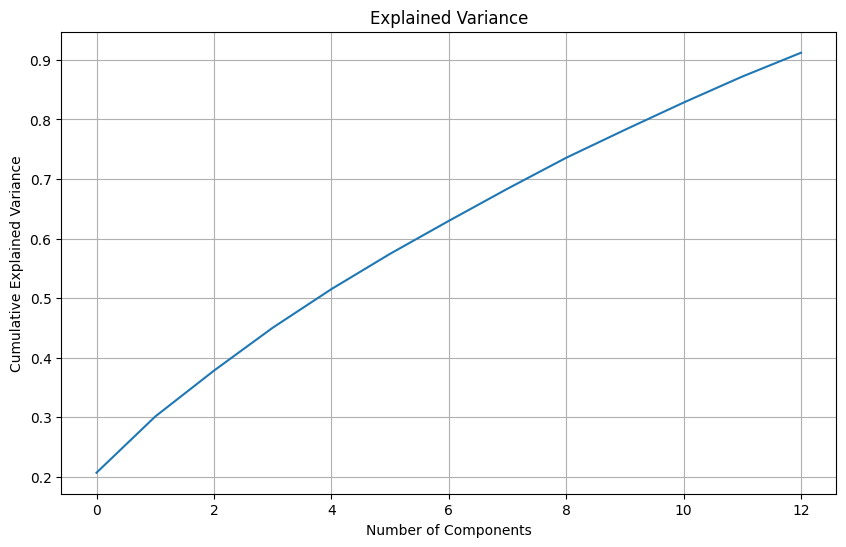

In [51]:
# Plot the explained variance
plt.figure(figsize=(10,6))
plt.plot(cumulative_variance)
plt.title('Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()
